# Personality-Driven Experiences


---


##ML Classification Case Study


* Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

* Read and Explore Dataset

In [ ]:
df=pd.read_csv("/content/personality_dataset.csv")
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [ ]:
print("Shape of Data\n")
print(df.shape)
print('------------------------------------------------------------')

print("Data_type")
print(df.dtypes)
print('------------------------------------------------------------')

print("\nInfo. of Data\n")
display(df.info())
print('------------------------------------------------------------')

print("\nValue count in data\n")
for col in df:
  print(f"\nValue count in {col}")
  print(df[col].value_counts())
  print("----------------------------------------------------------")


Shape of Data

(2900, 8)
------------------------------------------------------------
Data_type
Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object
------------------------------------------------------------

Info. of Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle

None

------------------------------------------------------------

Value count in data


Value count in Time_spent_Alone
Time_spent_Alone
0.0     369
2.0     357
3.0     353
1.0     326
9.0     206
10.0    196
4.0     190
7.0     190
8.0     180
5.0     180
6.0     150
11.0    140
Name: count, dtype: int64
----------------------------------------------------------

Value count in Stage_fear
Stage_fear
No     1417
Yes    1410
Name: count, dtype: int64
----------------------------------------------------------

Value count in Social_event_attendance
Social_event_attendance
2.0     408
0.0     378
1.0     322
3.0     317
4.0     255
6.0     239
7.0     239
9.0     236
5.0     224
8.0     206
10.0     14
Name: count, dtype: int64
----------------------------------------------------------

Value count in Going_outside
Going_outside
0.0    498
2.0    456
1.0    429
5.0    374
4.0    359
6.0    335
3.0    209
7.0    174
Name: count, dtype: int64
----------------------------------------------------

* Statistical Summary

In [ ]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


*  Visualize numerical features

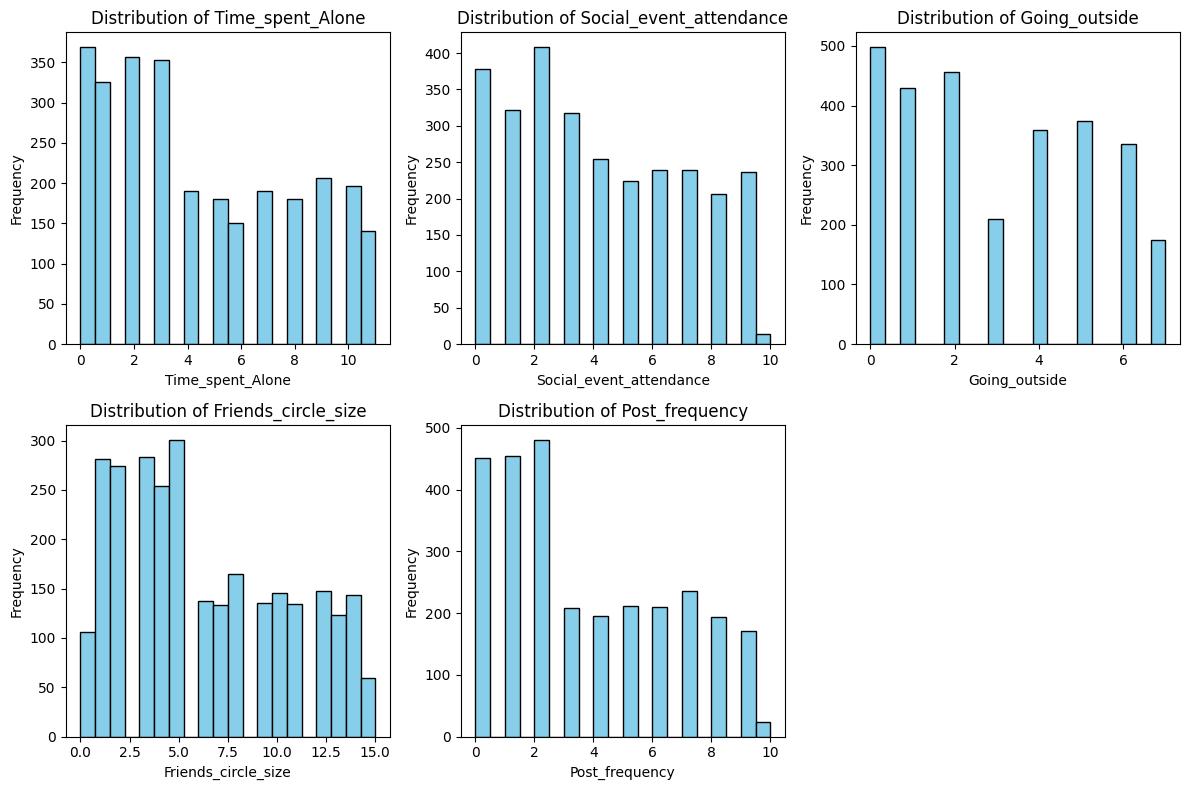

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



*Most distributions appear right-skewed (positively skewed),values are concentrated on the lower end.
None of the distributions seem perfectly normal (bell-shaped symmetry)*


---



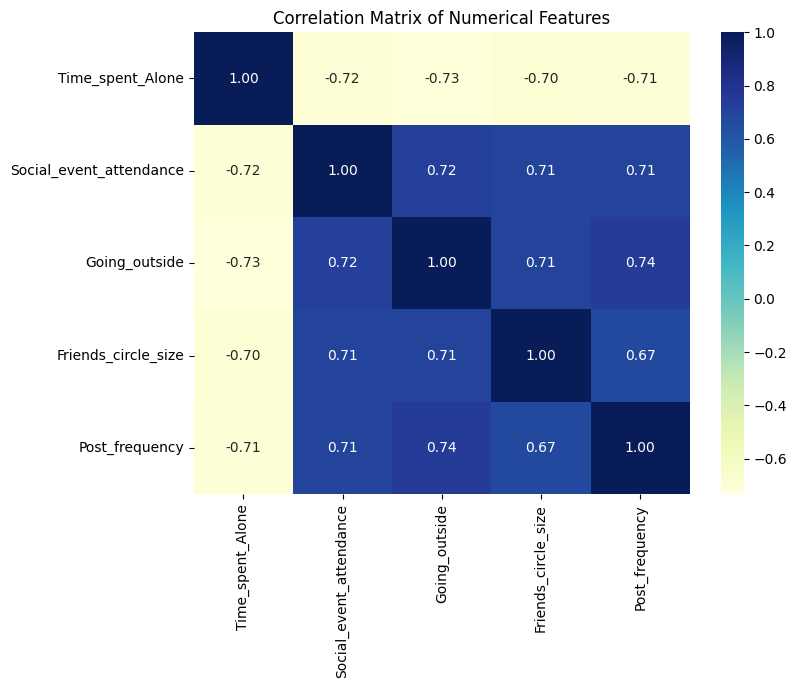

In [ ]:
correlation_matrix = df.corr(numeric_only= True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

*The correlation matrix is not of much significance here,since the target 'Personality' is missing,thus not exhibiting any correlation of features with target.*

*Hyopthesis Testing will help us determine the correlation,however missing values needs to be dealt with first, for accurate results*


---



* Determine Traget Variable

In [ ]:
target_variable = 'Personality'
print(f"The target variable is: {target_variable}")

The target variable is: Personality


* Finding missing and Hnadling them



In [ ]:
print("Missing values count\n")
print(df.isnull().sum())
print("-------------------------------------------------------")
print("\nMissing values % \n")
missing_percentage=(df.isnull().sum()/len(df))*100
print(missing_percentage)


Missing values count

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64
-------------------------------------------------------

Missing values % 

Time_spent_Alone             2.172414
Stage_fear                   2.517241
Social_event_attendance      2.137931
Going_outside                2.275862
Drained_after_socializing    1.793103
Friends_circle_size          2.655172
Post_frequency               2.241379
Personality                  0.000000
dtype: float64


*For numerical data, we are using median values to replace missing values,and for categorical features, we are using mode to replace missing values.*

In [ ]:
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())


* Handling duplicates
---------------
*There is no unique identifier in the dataset,thus we are considering all duplicates true case and dropping them.*

In [ ]:
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicates}")
df.drop_duplicates(inplace=True)


Number of duplicate rows: 448


*  Outlier Detection and Handling (IQR Method)

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)

    df.loc[(df[col] < lower_bound), col] = lower_bound
    df.loc[(df[col] > upper_bound), col] = upper_bound
    print(f"Number of outliers replaced in '{col}': {num_outliers}")


Number of outliers replaced in 'Time_spent_Alone': 0
Number of outliers replaced in 'Social_event_attendance': 0
Number of outliers replaced in 'Going_outside': 0
Number of outliers replaced in 'Friends_circle_size': 0
Number of outliers replaced in 'Post_frequency': 0


* **Hypothesis Testing**
---

To understand how each input feature is correlated with the target variable Personality.

*1. Weekly Social-Media Posts vs Personality — ANOVA*

In [ ]:
from scipy.stats import f_oneway, chi2_contingency
personality_groups = [df['Post_frequency'][df['Personality'] == personality] for personality in df['Personality'].unique()]

f_statistic, p_value = f_oneway(*personality_groups)

print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA P-value: {p_value}")


ANOVA F-statistic: nan
ANOVA P-value: nan


*There is a  significant difference in mean Post_frequency between introverts and extroverts. This indicates that extroverts post more frequently on social media.*


---



*2.   Drained_After_Socializing vs Personality — Chi-Square Test*

In [ ]:
contingency1 = pd.crosstab(df['Drained_after_socializing'], df['Personality'])
chi2_1, p_val1, _, _ = chi2_contingency(contingency1)
print("\nChi-Square - Drained After Socializing vs Personality\n")
print(f"Chi2: {chi2_1}\np-value: {p_val1}")



Chi-Square - Drained After Socializing vs Personality

Chi2: 1646.551070055507
p-value: 0.0


*Strong association shown. Users who feel drained after socializing are  more likely to be introverts.*


---





*3. Stage Fear vs Personality — Chi-Square Test*

In [ ]:
contingency2 = pd.crosstab(df['Stage_fear'], df['Personality'])
chi2_2, p_val2, _, _ = chi2_contingency(contingency2)
print("\nChi-Square - Stage Fear vs Personality\n")
print(f"Chi2: {chi2_2}\np-value: {p_val2}")


Chi-Square - Stage Fear vs Personality

Chi2: 1653.3875009458084
p-value: 0.0


*Stage fear is significantly associated with being an introvert.*

-------------

**Data preparation**
--

##SubTask
Prepare the data for model training by converting categorical features into numerical representations.







In [ ]:
# Identify categorical columns
categorical_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

# Check the shape of the encoded DataFrame
print(df_encoded.shape)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Drained_after_socializing_Yes,Personality_Introvert
0,4.0,4.0,6.0,13.0,5.0,False,False,False
1,9.0,0.0,0.0,0.0,3.0,True,True,True
2,9.0,1.0,2.0,5.0,2.0,True,True,True
3,0.0,6.0,7.0,14.0,8.0,False,False,False
4,3.0,9.0,4.0,8.0,5.0,False,False,False


(2452, 8)


## Feature engineering

### Subtask:
Engineer new features from existing ones to potentially improve model performance.

In [ ]:
# Create interaction terms
df_encoded['Social_Alone_Interaction'] = df_encoded['Social_event_attendance'] * df_encoded['Time_spent_Alone']
df_encoded['GoingOut_Friends_Interaction'] = df_encoded['Going_outside'] * df_encoded['Friends_circle_size']

# Create polynomial features
df_encoded['Time_Spent_Alone_Squared'] = df_encoded['Time_spent_Alone']**2
df_encoded['Post_Frequency_Cubed'] = df_encoded['Post_frequency']**3

# Evaluate the impact of new features (example using correlation)
correlation_with_target = df_encoded.corr()['Personality_Introvert'].abs().sort_values(ascending=False)
print(correlation_with_target)

# Remove features with low correlation (example threshold)
correlation_threshold = 0.05
features_to_remove = correlation_with_target[correlation_with_target < correlation_threshold].index
df_encoded = df_encoded.drop(columns=features_to_remove)

display(df_encoded.head())
print(df_encoded.shape)

Personality_Introvert            1.000000
Stage_fear_Yes                   0.821991
Drained_after_socializing_Yes    0.820291
Going_outside                    0.709168
Time_spent_Alone                 0.697855
Social_event_attendance          0.696299
Post_frequency                   0.690380
GoingOut_Friends_Interaction     0.670397
Friends_circle_size              0.660079
Time_Spent_Alone_Squared         0.626189
Post_Frequency_Cubed             0.505242
Social_Alone_Interaction         0.026945
Name: Personality_Introvert, dtype: float64


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Drained_after_socializing_Yes,Personality_Introvert,GoingOut_Friends_Interaction,Time_Spent_Alone_Squared,Post_Frequency_Cubed
0,4.0,4.0,6.0,13.0,5.0,False,False,False,78.0,16.0,125.0
1,9.0,0.0,0.0,0.0,3.0,True,True,True,0.0,81.0,27.0
2,9.0,1.0,2.0,5.0,2.0,True,True,True,10.0,81.0,8.0
3,0.0,6.0,7.0,14.0,8.0,False,False,False,98.0,0.0,512.0
4,3.0,9.0,4.0,8.0,5.0,False,False,False,32.0,9.0,125.0


(2452, 11)


*Social_Alone_Interaction was dropped because of weak correlation.*

----

* Min-Max Scaling for KNN

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = ['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency','GoingOut_Friends_Interaction']
scaler = MinMaxScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

df_encoded[numeric_cols].head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,GoingOut_Friends_Interaction
0,0.363636,0.4,0.857143,0.866667,0.5,0.742857
1,0.818182,0.0,0.000000,0.000000,0.3,0.000000
2,0.818182,0.1,0.285714,0.333333,0.2,0.095238
3,0.000000,0.6,1.000000,0.933333,0.8,0.933333
4,0.272727,0.9,0.571429,0.533333,0.5,0.304762


## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_encoded.drop('Personality_Introvert', axis=1)
y = df_encoded['Personality_Introvert']

# Split data into training and temporary sets (80/20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split temporary set into validation and testing sets (50/50 split)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1961, 10)
y_train shape: (1961,)
X_val shape: (245, 10)
y_val shape: (245,)
X_test shape: (246, 10)
y_test shape: (246,)


## Model training

**1. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initializing the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Training the classifier on the training data
dt_model.fit(X_train, y_train)

print(dt_model)


DecisionTreeClassifier(random_state=42)


* KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)
print(knn_model)


KNeighborsClassifier()


* Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000) # Increased max_iter

logreg_model.fit(X_train, y_train)

print(logreg_model)

LogisticRegression(max_iter=1000)


* Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

print(rf_model)

RandomForestClassifier(random_state=42)


 ## Hyperparameter Tuning:


---

*using only 'liblinear' solver for logistic regression, since it is more robust for small to medium datasets*

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Hyperparameter tuning for Logistic Regression
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports l1
}
logreg_grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logreg, cv=5)
logreg_grid.fit(X_train, y_train)
optimized_logreg_model = logreg_grid.best_estimator_

# Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': range(1, 21),  # Test a range of neighbor values
    'metric': ['euclidean', 'manhattan']  # Explore distance metrics
}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
knn_grid.fit(X_train, y_train)
optimized_knn_model = knn_grid.best_estimator_

# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'max_depth': range(1, 11),  # Explore various tree depths
    'min_samples_split': [2, 5, 10],  # Adjust minimum samples for splitting
    'min_samples_leaf': [1, 2, 4],  # Adjust minimum samples per leaf
    'criterion': ['gini', 'entropy', 'log_loss']  # Explore different split criteria
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
dt_grid.fit(X_train, y_train)
optimized_dt_model = dt_grid.best_estimator_

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)
optimized_rf_model = rf_grid.best_estimator_

print("Optimized Random Forest Model:", optimized_rf_model)
print("Optimized Logistic Regression Model:", optimized_logreg_model)
print("Optimized KNN Model:", optimized_knn_model)
print("Optimized Decision Tree Model:", optimized_dt_model)

Optimized Random Forest Model: RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                       random_state=42)
Optimized Logistic Regression Model: LogisticRegression(C=0.01, max_iter=1000, solver='liblinear')
Optimized KNN Model: KNeighborsClassifier(metric='manhattan', n_neighbors=11)
Optimized Decision Tree Model: DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)




---
 Optimized Models

#### 1. Logistic Regression

 **Best Parameters**:
  - C = 0.01
  - solver = 'liblinear'
  - max_iter = 1000

---

#### 2. K-Nearest Neighbors (KNN)

 **Best Parameters**:
  - n_neighbors = 11
  - metric = 'manhattan'


---

#### 3. Decision Tree

-**Best Parameters**:
  - max_depth = 2
  - min_samples_split = 5
  - min_samples_leaf = 4
  ----

### 4. Random Forest

-**Best Parameters**:
  - max_depth=10
  - min_samples_leaf=2
  ----

## Model evaluation

*Evaluate the performance of the optimized models on the test set using the specified metrics and create a summary table for comparison.*

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Predict on the test set
logreg_pred = optimized_logreg_model.predict(X_test)
knn_pred = optimized_knn_model.predict(X_test)
dt_pred = optimized_dt_model.predict(X_test)
rd_pred= optimized_rf_model.predict(X_test)
# Calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

logreg_metrics = evaluate_model(y_test, logreg_pred)
knn_metrics = evaluate_model(y_test, knn_pred)
dt_metrics = evaluate_model(y_test, dt_pred)
rd_metrics = evaluate_model(y_test, rd_pred)

# Create a summary table
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
results = pd.DataFrame(
    # Include rd_metrics here to match the length of model_names
    [logreg_metrics, knn_metrics, dt_metrics, rd_metrics],
    index=model_names,
    columns=metrics
)
display(results)

,Accuracy,Precision,Recall,F1-score,AUC-ROC
Logistic Regression,0.926829,0.902655,0.935780,0.918919,0.927744
KNN,0.926829,0.902655,0.935780,0.918919,0.927744
Decision Tree,0.926829,0.902655,0.935780,0.918919,0.927744
Random Forest,0.918699,0.893805,0.926606,0.909910,0.919507


#Personality Prediction:


---


1. **Data Loading & Exploration**
* Loaded the personality_dataset.

* Explored the dataset’s shape, data types, missing values, and value counts for categorical columns.

2. **Statistical Summary & Visualization**

* Generated descriptive statistics for all numerical features.

* Visualized distributions using histograms.

* Created a correlation matrix to assess relationships among numerical variables.

3. **Target Variable Identification**

* Identified 'Personality' as the target variable for classification.

4. **Data Cleaning**

***Handled missing values:***

* Imputed median for numerical features.

* Imputed mode for categorical features.

* Detected and removed duplicate rows.

5. **Outlier Detection & Handling**
* Used the Interquartile Range (IQR) method to detect outliers and capped them with upper and lower bounds.



6. **Hypothesis Testing**

* ANOVA for numerical features vs. 'Personality'.

* Chi-Square test for categorical features vs. 'Personality'.


7. **Data Preparation**
* Applied One-Hot Encoding to convert categorical variables to numeric.

8. **Feature Engineering**

* Created polynomial features.

* Evaluated correlation of engineered features with the target.

* Removed low-correlation or redundant features to reduce dimensionality.

9. **Feature Scaling**
* Applied Min-Max Scaling to normalize numerical variables.


10. **Data Splitting**
* Split the dataset into Train,Test and Validation sets.

11. **Model Training**

*Trained four supervised classification models:*

* Decision Tree

* K-Nearest Neighbors (KNN)

* Logistic Regression

* Random Forest

12. **Hyperparameter Tuning**
* Used GridSearchCV to tune hyperparameters for each model.

* Selected the best parameter combinations based on cross-validated performance.

13. **Model Evaluation**

*Evaluated final models on the test set using:*

* Accuracy

* Precision

* Recall

* F1-Score

#**Conclusion**

Although all models performed well, Logistic Regression stands out as the most efficient and interpretable model, offering top-tier performance with minimal complexity. It is particularly suitable when model transparency and explainability are important.

However, if robustness to variance is required,then  Random Forest remains a strong candidate.

